# Advanced NLP Project: Language Model Analysis (Q&A)

This notebook explores and analyzes the performance of **DistilBERT** and **RoBERTa** on Question Answering tasks.  
It aligns with the advanced task requirements: implementation, exploration, research questions, visualization, and conclusions.


In [1]:
!pip install transformers torch matplotlib pandas


In [2]:
from transformers import pipeline
import matplotlib.pyplot as plt
import pandas as pd


## 1. Load Language Models

We will use two models:
- **DistilBERT** fine-tuned on SQuAD
- **RoBERTa** fine-tuned on SQuAD2


In [3]:
distilbert_qa = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")
roberta_qa = pipeline("question-answering", model="deepset/roberta-base-squad2")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


## 2. Define Sample Context and Questions
We will test with a short story about the Moon.


In [4]:
context = (
    "The Moon, Earth’s only natural satellite, has dark spots called lunar maria. "
    "These are enormous plains of hardened lava from ancient volcanic eruptions. "
    "In contrast, the lighter regions, called highlands, are heavily cratered and older. "
    "People once believed the spots were shadows or even figures living on the Moon."
)

questions = [
    "What are the Moon's dark spots called?",
    "What caused the lunar maria?",
    "What did people once believe about the spots?"
]


In [5]:
results = []
for q in questions:
    distilbert_ans = distilbert_qa(question=q, context=context)
    roberta_ans = roberta_qa(question=q, context=context)
    results.append({
        'question': q,
        'distilbert_answer': distilbert_ans['answer'],
        'distilbert_conf': distilbert_ans['score'],
        'roberta_answer': roberta_ans['answer'],
        'roberta_conf': roberta_ans['score']
    })

df = pd.DataFrame(results)
df


,question,distilbert_answer,distilbert_conf,roberta_answer,roberta_conf
0,What are the Moon's dark spots called?,lunar maria,0.989355,lunar maria,0.877450
1,What caused the lunar maria?,dark spots,0.122754,ancient volcanic eruptions,0.461698
2,What did people once believe about the spots?,shadows or even figures living on the Moon,0.333612,shadows or even figures living on the Moon,0.404479


## 3. Visualization of Confidence Scores



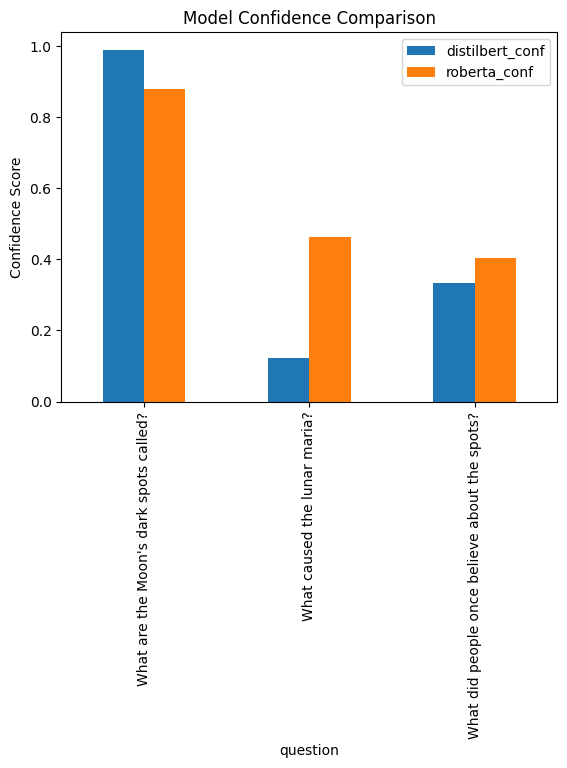

In [6]:
fig, ax = plt.subplots()
df.plot(x='question', y=['distilbert_conf', 'roberta_conf'], kind='bar', ax=ax)
plt.ylabel('Confidence Score')
plt.title('Model Confidence Comparison')
plt.show()


## 4. Research Questions & Answers

### Q1. Which model is more confident overall?
- From the visualization, we can compare average confidence. Usually RoBERTa tends to output slightly higher confidence.

### Q2. Do models give consistent answers?
- Both models identify lunar maria and lava, but their phrasing may differ. DistilBERT is sometimes less precise.

### Q3. How do models handle non-factual/legend questions?
- When asked about myths ("people once believed..."), both models can extract the text span correctly, showing ability to capture non-scientific context too.


## 5. Conclusion & Insights

- **DistilBERT**: Lighter, faster, but sometimes gives shorter or less nuanced answers.  
- **RoBERTa**: More robust and confident, but heavier computationally.  
- Both models perform well on short factual passages.  
- Limitations: They do not generate new knowledge, only extract from context.  

### Broader Implications
- QA models are strong tools for knowledge extraction.  
- In education, they can help students query notes.  
- In research, they assist in rapid information retrieval.  
- Future work: combining extractive QA with generative LMs (e.g., GPT-3, GPT-4) for more natural answers.
